# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 
* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

## Implementation of the experiment

------------------------LOGISTIC REGRESSION:------------------------

Cross-Validation: means & stds for given c-values
Mean: 0.95133 | Standard Deviation:(+/-0.043) | for {'C': 0.01}
Mean: 0.95133 | Standard Deviation:(+/-0.039) | for {'C': 0.03}
Mean: 0.95267 | Standard Deviation:(+/-0.036) | for {'C': 0.1}
Mean: 0.94533 | Standard Deviation:(+/-0.038) | for {'C': 0.3}
Mean: 0.94333 | Standard Deviation:(+/-0.039) | for {'C': 0.5}
Mean: 0.94267 | Standard Deviation:(+/-0.036) | for {'C': 1.0}
Mean: 0.94067 | Standard Deviation:(+/-0.039) | for {'C': 3.0}
Mean: 0.94000 | Standard Deviation:(+/-0.038) | for {'C': 5.0}
Mean: 0.93800 | Standard Deviation:(+/-0.043) | for {'C': 10.0}


Best score: 0.1

Classification report for the best c-parameter (test set):
             precision    recall  f1-score   support

          0       1.00      0.96      0.98        27
          1       0.79      0.84      0.81        31
          2       1.00      1.00      1.00        27
          3       0

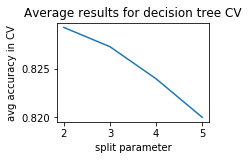

In [199]:
#### %pylab inline
from sklearn.datasets import load_digits
from sklearn import datasets # to load the dataset
from sklearn import metrics
from sklearn.preprocessing import StandardScaler # to normalize data (NN is very sensitive to this!)
from sklearn.model_selection import train_test_split #to split in train and test set
from sklearn.linear_model import LogisticRegression #logistic regression classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier # neural network classifier
from sklearn.model_selection import GridSearchCV, cross_val_score #BONUS: to tune parameters using cross-validation
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


# load mnist dataset and split in train and test set.
digits = load_digits()
X_train_mnist = reshape(digits.images[:1500],(1500,64))
X_test_mnist = reshape(digits.images[1500:],(297,64))
y_train_mnist = digits.target[:1500]
y_test_mnist = digits.target[1500:]


plt.figure(1)

# your implementation here

def logRegr():
    
    #prepare c-values for cross validation
    cVal = [0.01, 0.03, 0.1, 0.3, 0.5, 1., 3., 5., 10.]
    
    print('------------------------LOGISTIC REGRESSION:------------------------')
    print('');
    print('Cross-Validation: means & stds for given c-values');
    #define the classifier
    cv_regClass = LogisticRegression()
    #use GridSearchCV to generate the best c-value for a classifier, from the cVal array
    cv_reg = GridSearchCV(estimator=cv_regClass, param_grid = dict(C=cVal), cv=10, scoring='accuracy')
    #fit the data
    cv_reg.fit(X_train_mnist, y_train_mnist)
    #print the mean and s.dev. scores for every c-value for comparison
    means_cv_reg = cv_reg.cv_results_['mean_test_score']
    stds_cv_reg = cv_reg.cv_results_['std_test_score']
    for mean, std, params in zip(means_cv_reg, stds_cv_reg, cv_reg.cv_results_['params']):
        print("Mean: %0.5f | Standard Deviation:(+/-%0.03f) | for %r" % (mean, std * 2, params))
    print()
   
    #plot the mean accuracies for logistic regression CV
    ax1 = plt.subplot("211")
    ax1.set_title("Average results for logistic regression CV")
    ax1.set_ylabel('avg accuracy in CV')
    ax1.set_xlabel('regularization parameter')
    ax1.plot(cVal, means_cv_reg)
    print()
    
    #get the best c-value from grid search
    best = cv_reg.best_params_['C']
    #define logistic regression using the best value
    cv_regBest = LogisticRegression(C=best)
    #fit the training data
    cv_regBest.fit(X_train_mnist, y_train_mnist)
    #get the estimates
    predicted = cv_regBest.predict(X_test_mnist)
    
    print('Best score: {}'.format(best))
    print()
    print('Classification report for the best c-parameter (test set):')
    print(classification_report(y_test_mnist, predicted))
    print()
    print('Confusion matrix for the best c-parameter (test set):')
    print(metrics.confusion_matrix(y_test_mnist, predicted))
    
def kNearest():
    
    scaler = StandardScaler()
    XTransformTrain = scaler.fit_transform(X_train_mnist, y_train_mnist)
    XTransformTest = scaler.fit_transform(X_test_mnist, y_test_mnist)
    
    #prepare k-values for cross validation
    kArr = [1,2,3,4,5,6,7,8,9,10]
    
    print('------------------------K-NEAREST NEIGHBORS:------------------------')        
    print('');
    print('Cross-Validation: means & stds for given c-values');
    #define the knn-classifier
    cv_knClass = KNeighborsClassifier()
    #perform the grid search for different k-values
    cv_knn = GridSearchCV(estimator=cv_knClass, param_grid = dict(n_neighbors=kArr), cv=10, scoring='accuracy')
    #fi the data
    cv_knn.fit(XTransformTrain, y_train_mnist)
    #get and print means and stds from the cv_knn object
    means_cv_knn = cv_knn.cv_results_['mean_test_score']
    stds_cv_knn = cv_knn.cv_results_['std_test_score']
    for mean, std, params in zip(means_cv_knn, stds_cv_knn, cv_knn.cv_results_['params']):
        print("Mean: %0.5f | Standard Deviation:(+/-%0.03f) | for %r" % (mean, std * 2, params))
            
    #plot the mean accuracies for k-nearest neighbor CV
    ax2 = plt.subplot("212")
    ax2.set_title("Average results for k-nearest neighbor CV")
    ax2.set_ylabel('avg accuracy in CV')
    ax2.set_xlabel('k-value')
    ax2.plot(kArr, means_cv_knn)
    print()
    
    #get the best parameter from the cv_knn object 
    best = cv_knn.best_params_['n_neighbors']
    #use it to define the new knn classifier
    cv_knBest = KNeighborsClassifier(n_neighbors=best)
    #fit the data
    cv_knBest.fit(XTransformTrain, y_train_mnist)
    #get estimates
    predicted = cv_knBest.predict(XTransformTest)
    
    print('Best score: {}'.format(best))
    print()
    print('Classification report for the best k-score (test set):')
    print(classification_report(y_test_mnist, predicted))
    print()
    print('Confusion matrix for the best k-score (test set):')
    print(metrics.confusion_matrix(y_test_mnist, predicted))
    
    
def tree():
    
    #prepare c-values for cross validation
    cVal = [2, 3, 4, 5]
    
    print('------------------------DECISION TREE:------------------------')
    print('');
    print('Cross-Validation: means & stds for given split-values');
    #define the classifier
    cv_treeClass = DecisionTreeClassifier()
    #use GridSearchCV to generate the best c-value for a classifier, from the cVal array
    cv_tree = GridSearchCV(estimator=cv_treeClass, param_grid = dict(min_samples_split=cVal), cv=10, scoring='accuracy')
    #fit the data
    cv_tree.fit(X_train_mnist, y_train_mnist)
    #print the mean and s.dev. scores for every c-value for comparison
    means_cv_tree = cv_tree.cv_results_['mean_test_score']
    stds_cv_tree = cv_tree.cv_results_['std_test_score']
    for mean, std, params in zip(means_cv_tree, stds_cv_tree, cv_tree.cv_results_['params']):
        print("Mean: %0.5f | Standard Deviation:(+/-%0.03f) | for %r" % (mean, std * 2, params))
    print()
   
    #plot the mean accuracies for logistic regression CV
    ax1 = plt.subplot("221")
    ax1.set_title("Average results for decision tree CV")
    ax1.set_ylabel('avg accuracy in CV')
    ax1.set_xlabel('split parameter')
    ax1.plot(cVal, means_cv_tree)
    print()
    
    #get the best c-value from grid search
    best = cv_tree.best_params_['min_samples_split']
    #define logistic regression using the best value
    cv_treeBest = DecisionTreeClassifier(min_samples_split=best)
    #fit the training data
    cv_treeBest.fit(X_train_mnist, y_train_mnist)
    #get the estimates
    predicted = cv_treeBest.predict(X_test_mnist)
    
    print('Best score: {}'.format(best))
    print()
    print('Classification report for the best split-parameter (test set):')
    print(classification_report(y_test_mnist, predicted))
    print()
    print('Confusion matrix for the best split-parameter (test set):')
    print(metrics.confusion_matrix(y_test_mnist, predicted))

logRegr()
#kNearest()
tree()


## Results and analysis of the experiment

### 1. The dataset
The data I am working on is a MNIST dataset, which consists of 1500 digitized samples of handwritten digits from 0 to 9. Each digit is denoted as an array of 64 digits that translate to brightness of pixels. Bright pixels define the contour of a number - therefore, the brighter the pixel, the higher the chance that it is within the range of a given number.

### 2. Classifiers

#### 2.1 Logistic Regression

The logistic regression classifier used in the exercise comes from the sklearn kit. The full documentation is available on the website: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

The function LogisticRegression() takes several parameters typical for this type of model estimation. The one that needs most attention is the regularization parameter. It is responsible for simplifying or specifying our model in order to avoid overfit or underfit. It is done by muptiplying further features in the model by a specified number so that they have a greater or smaller influence on the model, depending on whether we want to decrease bias or decrease variance. 

The sklearn function uses a C parameter which is an inverse of the usual lambda penalizer. This means that the smaller the number, the less we take into account certain features, and the less fit to the data we have. 

At the beginning of the analysis, I put an array of selected c - parameters through a for loop and picked the one that returned the best accuracy rate (calculated with the metrics.accuracy_score() function). The best c - rate turned out to be *0.03*. Later on, I proceeded to try and conduct a 10-fold cross validation on the training data, which would supposedly return a more robust and accurate prediction for the best parameter (details further).

#### 2.2 k-Nearest Neighbor

The k-nearest neighbor classifier also comes from the sklearn kit. Docs: http://scikit-learn.org/stable/modules/neighbors.html

The function KNeighborsClassifier calculates the distances from nearest neighbors, for all elements in the data set. Then based on the data, it returns k neighbors that are nearest to the test value, along with their indexes and target values. Based on the target values of nearest neighbors, and supported by a majority vote and other techniques of resolving ties, the algorithm returns a most lkely target value. 

The crucial value here is the k - number of nearest neighbors. There is always an optimum k-value that predicts with the highest accuracy, too small k might take anomalies into account and return mistaken results, while a too high k-value may extent the scope of neighbor detection beyond a reasonably accurate prediction.

Overall, the technique works with surprisingly high accuracy for the MNIST data set. Without tweaking the parameters (having k set by default as 0) returned accuracies of up to 92% on the test set.

After cross-validation, the accuracy score might get even higher. 

#### 2.3 Decision Tree

The decision tree classifier also comes from the sklearn kit. Docs: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

The goal is to create a model that predicts the value of a target variable by learning very simple decision rules from the data.

It is basically slicing the data set into multiple decision boundaries.

The variable we can manipulate here is the minimum number of samples required to make a slice. It has to be greater than one (otherwise anomalies would sneak in) but there is also an optimal value to it.
This can be done using cross-validation.


### 3. Cross-Validation 

#### 3.1 Logistic Regression

The cross validation for logistic regression was supposed to find the value of regularization parameter that would work most accurately for predicting output. Essentially, in cross-validation you iterate through k chunks of data that you make out of your training set, and then calculate prediction accuracies for each of them.

For finding the optimal value I used the GridSearchCV function. The function generates the best parameter out of a pre-made dictionary of parameters, and then fits the given data into an applicable regression model.

Here, the cross validation was 10-fold, meaning that the training data was separated into 10 parts, each of which had an accuracy value estimated. Then, averages were taken for every c-value from the dictionary.

The best c-value turned out to be: 0.1. Further, this value will be used for training the applicable data set and estimating the model, which in turn will be tested with the test set using a confusion matrix and classification report. Since its mean accuracy was the highest, and the estimator was relatively consistent (lowest standard deviation out of all parameters)

| Best score | Mean   | Standard Dev.
|------|------|------|
|   0.1  | 0.95267|+/-0.036


#### 3.2 k-Nearest Neighbor

The cross validation for k-nearest neighbor was supposed to find the number of nearest neighbors that would work most accurately for predicting output.

For finding the optimal value I used the GridSearchCV function again. The cross validation was 10-fold. Average accuracies were taken for every k-value from the dictionary.

The best k-value turned out to be: 3. Further, this value will be used for training the applicable data set and estimating the model, which in turn will be tested with the test set using a confusion matrix and classification report.

| Best score | Mean   | Standard Dev.
|------|------|------|
|   3  | 0.96133 |+/-0.045

#### 3.3 Decision Tree

The cross validation for decision tree was supposed to find the minimum number of samples required for a split that would work most accurately for predicting output.

The best split-value turned out to be: 2. Further, this value will be used for training the applicable data set and estimating the model, which in turn will be tested with the test set using a confusion matrix and classification report.

| Best score | Mean   | Standard Dev.
|------|------|------|
|   2  | 0.82933 |+/-0.106


### 4. Performance & Results Analysis
#### 3.1 Logistic Regression

After running the logistic regression, the classification report outputted a precision value of 0.90.
This means that in 90% of the cases, if a test sample was classified as a certain number, it was a match.
Recall in this case is slightly lower - 0.89 here means that per the entire number of samples in each class, an average of 89% was classified correctly. This difference should not be of massive significance in the further process. The F1 estimator is a harmonic mean of precision and recall, calculated as follows: 
F1 = 2 * (precision * recall) / (precision + recall)

The best precision and recall has occurred for class of number 2 - all samples of 2s have been correctly assigned.
An abnormally low value of precision can be noticed on class number 8 - only 0.68. This means that although most samples of 8s were correctly classified (high recall value), many numbers that weren't 8s were also classified as such. It could possibly be a few 3s, given their similar appearance, and the fact that for 3s the recall value is actually very low at 0.63.

Surprisingly, relatively low values could be observed for number 1 - at around 0.8 both precision and recall.

As for the *confusion matrix*, it is very apparent that the most misclassified class number was 3, with only 19 matches (should be 27). My hypothesis that it was missclassified as 8 got confirmed - this happened in 5 cases.
1s were often also msitaken frequently for 7, 8 and 9.


#### 3.2 k-Nearest Neighbor

After running the k-nearest neighbor function, the classification report outputted an average precision AND recall value of 0.93. Interestingly, the rounded f1 value was lower than both precision and recall, which stems from the way harmonic mean is calculated per each class.

Best values of precision and recall occurred for 0, where all samples were correctly assigned. Relatively high values also observable for 1. 

As for the *confusion matrix*, two digits can be considered under-classified: 2 and 3. For example, in 3 cases a 3 was classified as a 7. 

#### 3.3 Decision Tree

After making a decision tree, the classification report outputted an average precision and recall value of 0.76. That's very low compared to other classifiers. It is also visible on the confusion matrix where we consistently have errors appearing on just about every number in more or less equal amounts.

#### 3.3 Comparison

Firstly, there is a marked difference in performance between decision trees and two other classifiers. DTs' precision and recall values are lower by up to 20%, therefore it is the least robust classifier out of the three tested, and can be put out of the question for further use - unless there are improvements that could be done in any other parameters.

Overall, the k-nearest neighbor analysis has provided a greater precision and recall rate, as well as greater consistency (smaller STDs of these parameters) than logistic regression. 

Therefore, although both methods have limitations in recognizing different classes, K-Nearest Neighbor seems to be the more accurate, more consistent method for classifying handwriting samples from the MNIST dataset. 




